##Libraries

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Dense
import scipy.io
import time
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Sequential
from keras import optimizers
from sklearn.metrics import r2_score
import seaborn as sns
from keras.models import load_model

wczytany = load_model('/content/drive/MyDrive/MLThesis/Ranek_9_15_22.06.2021.h5')


##Feed Forward Neural Network

In [ ]:
dataset = scipy.io.loadmat('drive/MyDrive/MLThesis/data/qm7.mat')

np.set_printoptions(precision=3)

X = dataset['X'].reshape((7165, 529, 1))
CM =  dataset['X']
Y = np.transpose(dataset["T"]).reshape((7165,))
Y = np.abs(Y)
#plt.hist(Y)


print(CM[0].diagonal())
print(Y[0])

[36.858  0.5    0.5    0.5    0.5    0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.   ]
417.96


In [ ]:

dataset = scipy.io.loadmat('drive/MyDrive/MLThesis/data/qm7.mat')

X = dataset['X'].reshape((7165, 529, 1)) 
Y = np.transpose(dataset["T"]).reshape((7165,))

container = []
for i in X:
  container.append(i.max())
  

X_max = max(container)
Y_max = np.abs(dataset["T"].min())


X_scaled = X / X_max
Y_scaled = Y / Y_max


# Leave data that will be "unseen" in X_test and Y_test variables
X_trainvalidate, X_test, Y_trainvalidate, Y_test = train_test_split(X_scaled, 
                                                                    Y_scaled,  
                                                    test_size=.20, 
                                                    random_state=666)

# Data for the algo input
X_train, X_validation, Y_train, Y_validation = train_test_split(X_trainvalidate, 
                                                                Y_trainvalidate,  
                                                                test_size=.20, 
                                                                random_state=666)


model = Sequential()

# 64 -> 128 -> 529 -> Flatten -> 1
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(529, activation='relu', kernel_initializer='he_normal'))
model.add(Flatten())
model.add(Dense(1, activation='linear'))


model.compile(loss='mae',
              optimizer=optimizers.Adam(.001),
              metrics=['mae', tf.keras.metrics.RootMeanSquaredError()])



start = time.time()


reduce_eta = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, verbose=1)

n_epochs = 15

history = model.fit(X_train, Y_train,
                      batch_size=10,
                      epochs=n_epochs, 
                      callbacks=[reduce_eta],
                      verbose=1,
                      validation_data=(X_validation, Y_validation))

model.summary()

end = time.time()

print(f"Training time: {end-start}")
print(f"Number of epochs: {n_epochs}")

In [ ]:
model.summary()



print(f"Training time: {end-start}")
print(f"Number of epochs: {n_epochs}")

In [ ]:
approximated_energy = model.predict(X_test)


print(f"Test dataset error (MAE): {Y_max*mean_absolute_error(Y_test, approximated_energy)}")

Test dataset error (MAE): 20.701087951660156


In [ ]:
print(f"Length of X_trainvalidate: {len(X_trainvalidate)}")
print(f"Length of Y_trainvalidate: {len(Y_trainvalidate)}")
print(f"Length of X_test: {len(X_test)}")
print(f"Length of Y_test: {len(Y_test)}")
print(f"Length of X_train: {len(X_train)}")
print(f"Length of Y_train: {len(Y_train)}")
print(f"Length of X_validate: {len(X_validation)}")
print(f"Length of Y_validate: {len(Y_validation)}")

Length of X_trainvalidate: 5732
Length of Y_trainvalidate: 5732
Length of X_test: 1433
Length of Y_test: 1433
Length of X_train: 4585
Length of Y_train: 4585
Length of X_validate: 1147
Length of Y_validate: 1147


## Validation

In [ ]:
dataset = scipy.io.loadmat('drive/MyDrive/MLThesis/data/qm7.mat')

X = dataset['X'].reshape((7165, 529, 1)) 
Y = np.transpose(dataset["T"]).reshape((7165,))

container = []
for i in X:
  container.append(i.max())
  

X_max = max(container)
Y_max = np.abs(dataset["T"].min())


X_scaled = X / X_max
Y_scaled = Y / Y_max


# Leave data that will be "unseen" in X_test and Y_test variables
X_trainvalidate, X_test, Y_trainvalidate, Y_test = train_test_split(X_scaled, 
                                                                    Y_scaled,  
                                                    test_size=.20, 
                                                    random_state=666)

# Data for the algo input
X_train, X_validation, Y_train, Y_validation = train_test_split(X_trainvalidate, 
                                                                Y_trainvalidate,  
                                                                test_size=.20, 
                                                                random_state=666)


In [ ]:
print(f"Test dataset error (RMSE): {Y_max*mean_squared_error(Y_test, approximated_energy, squared=False)}")

Test dataset error (RMSE): 30.2939453125


In [ ]:
approximated_energy = wczytany.predict(X_test)


print(f"Test dataset error (MAE): {Y_max*mean_absolute_error(Y_test, approximated_energy)}")

Test dataset error (MAE): 20.701087951660156


In [ ]:
#plt.figure(figsize=(8,8))

loss = np.array(history.history["loss"]) * Y_max
mae = np.array(history.history["mae"]) * Y_max
rmse = np.array(history.history['root_mean_squared_error']) * Y_max
val_loss = np.array(history.history["val_loss"]) * Y_max
val_mae = np.array(history.history["val_mae"]) * Y_max
val_rmse = np.array(history.history['val_root_mean_squared_error']) * Y_max

epochs = [x for x in range(1, n_epochs + 1)]

print(f"Mean absolute error over epochs from test set {mae}")
print(f"Mean absolute error over epochs from validation set {val_mae}")
print(f"Root mean square error over epochs from test set {rmse}")
print(f"Root mean square error over epochs from validation set {val_rmse}")


Mean absolute error over epochs from test set [93.16646832 47.87572274 41.06897554 40.25903481 24.42037655 23.03879258
 20.66424495 20.45049806 20.34195368 20.18069474 19.89116481 19.87788716
 19.85096031 19.84029165 19.8396343 ]
Mean absolute error over epochs from validation set [51.11060247 43.5858292  26.72839712 40.22412178 22.97499903 23.15987968
 22.18537898 21.62820356 21.14918539 20.95064124 20.92211798 20.89656299
 20.86384657 20.86310144 20.86309327]
Root mean square error over epochs from test set [223.80965054 119.28719044  98.05052853  86.89326054  79.47868931
  73.25348032  68.52360743  64.87111866  61.84079313  59.35721934
  57.24448884  55.48818076  53.96908206  52.58785534  51.40082446]
Root mean square error over epochs from validation set [139.6231606  106.2080847   91.46209496  83.15370762  76.0961141
  70.75951958  66.57423449  63.24448815  60.52974361  58.26333207
  56.33953044  54.684295    53.24379656  51.97897792  50.85848227]


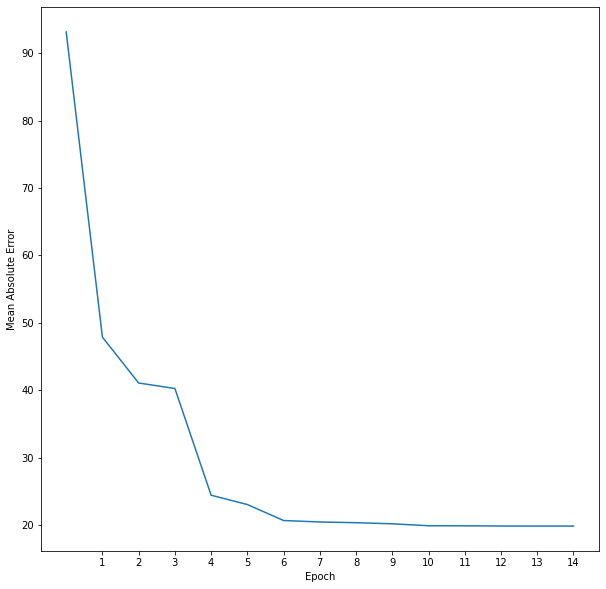

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.xticks(epochs)
plt.plot(loss)

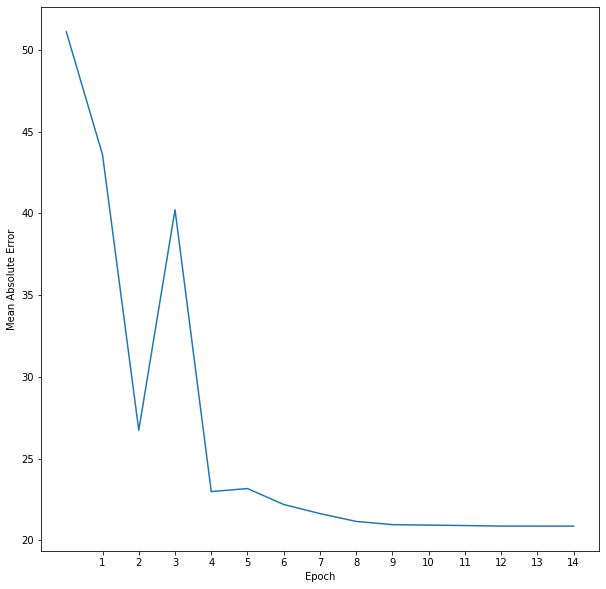

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.xticks(epochs)
plt.plot(val_loss)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


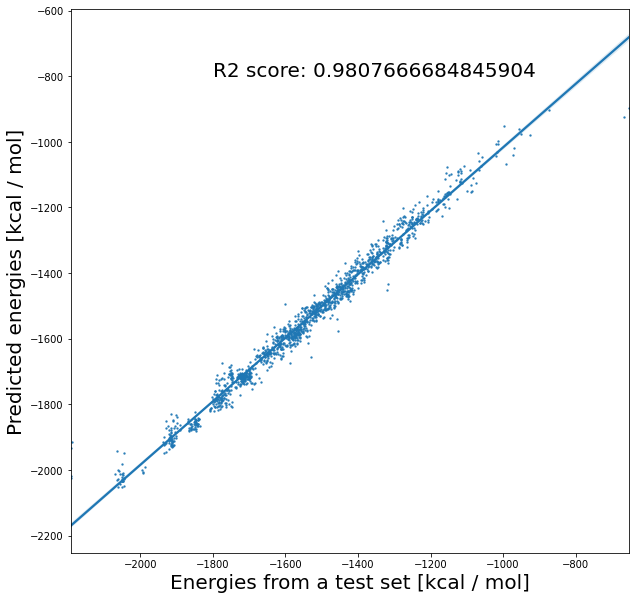

In [ ]:

R2_scr = r2_score(Y_max * Y_test, Y_max * approximated_energy)

plt.figure(figsize=(10,10))
plt.xlabel("Energies from a test set [kcal / mol]", size=20)
plt.ylabel("Predicted energies [kcal / mol]", size=20)
plt.annotate(f"R2 score: {R2_scr}", (-1800.0, -800), size=20)


sns.regplot(Y_test * Y_max, approximated_energy * Y_max, marker="o", scatter_kws={'s':2})

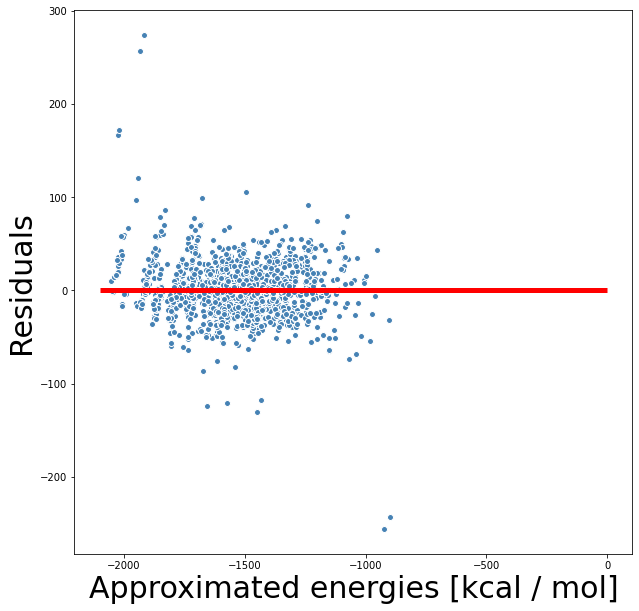

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(approximated_energy * Y_max, (approximated_energy - Y_test.reshape(Y_test.shape[0], 1)) * Y_max, c='steelblue', marker='o', edgecolor='white', label='Test data')
plt.xlabel("Approximated energies [kcal / mol]", size=30)
plt.ylabel("Residuals", size=30)
plt.hlines(y=0, xmin= -2100.0, xmax= 0.0, color='red', lw=5)
#plt.xlim([-1.0, -0.20])




In [ ]:
model.save('Ranek_9:15_22.06.2021.h5')